part1 : To find the maximum value of the given objective function f(x, y, z) = e sin(40z) + sin(60 cos(z)) + e sin(50x) sin(60e y ) + sin(70 sin(x)) + sin(sin(80y)) − sin(10(x + y)) + x 2 + y 2 + z 2 / 100 within a defined constrain : 0 ≤ x, y, z ≤ 5 and x, y, z ∈ R. I implement a random search algorithm, climbing hill, iterated_local_search algorithm, simulated annealing and genetic algorithm as in the code shown below

In [7]:
import random
import numpy as np
import math

# Define the Objective function
def objective_function(x, y, z):
    f = math.exp(math.sin(40 * z)) + math.sin(60 * math.cos(z)) + math.exp(math.sin(50 * x)) \
        + math.sin(60 * math.exp(y)) + math.sin(70 * math.sin(x)) + math.sin(math.sin(80 * y)) \
        - math.sin(10 * (x + y)) + (x**2 + y**2 + z**2) / 100
    return f

# Define constraints by generating random numbers between 0 and 5
# Set initial values for x, y, z
x = random.uniform(0, 5)
y = random.uniform(0, 5)
z = random.uniform(0, 5)

# Define Random search algorithm
def Random_search(x, y, z, steps=1000):
    """
    Perform Random Search to optimize the given function by exploring the input of x, y, and z with random values within the specified constraints.
    It returns the maximum value of the objective function
        and the corresponding values of x, y, and z that yields the maximum value of the objective function.
    """
    # Calculate the function value for the initial solution
    best_f = objective_function(x, y, z)
    best_x, best_y, best_z = x, y, z

    # Perform random search
    for i in range(1, steps):
        # Generate new random values for x, y, z
        xn = random.uniform(0, 5)
        yn = random.uniform(0, 5)
        zn = random.uniform(0, 5)

        # Calculate the function value for the new solution
        new_f = objective_function(xn, yn, zn)

        # Update the best solution if the new value is greater
        if new_f > best_f:
            best_x, best_y, best_z = xn, yn, zn
            best_f = new_f

    return best_f, best_x, best_y, best_z


# Define climbing hill algorithm
def climbing_hill(x, y, z, steps=200):
    """
    Perform hill climbing to optimize the given function.
    Args:
       Initial value for x, y and z with random values within the specified constraints.
       Number of steps to perform the hill climbing. Defaults to 200.
    Returns:
      the maximum value of the objective function
        and the corresponding values of x, y, and z.
    """
    # Calculate the objective function value for the initial solution
    best_f = objective_function(x, y, z)

    # Perform hill climbing
    for i in range(1, steps):
        # Generate new candidate solution by adding Gaussian noise to the current solution
        xn = x + random.gauss(0, 0.1)  # Hill climb step for x
        yn = y + random.gauss(0, 0.1)  # Hill climb step for y
        zn = z + random.gauss(0, 0.1)  # Hill climb step for z

        # Evaluate the objective function for the new solution
        new_f = objective_function(xn, yn, zn)

        # Update the current solution if the new solution is better
        if new_f > best_f:
            x, y, z = xn, yn, zn
            best_f = new_f

    return best_f, x, y, z


# Define iterated_local_search algorithm
def iterated_local_search(x, y, z, small_steps=50, big_steps=10):
    """
    Perform iterated local search (ILS) to optimize the given function.

    Args:
        Initial value for x, y and z with random values within the specified constraints.
        small_steps (int, optional): Number of small steps inside each hill climb. Defaults to 50.
        big_steps (int, optional): Number of big jumps between the hill climbs. Defaults to 10.

    Returns:
       the maximum value of the objective function
        and the corresponding values of x, y, and z.
    """
    # Initialize the best objective function value
    fopt = objective_function(x, y, z)

    # Perform iterated local search (ILS)
    for i in range(1, big_steps):
        for i in range(1, small_steps):
            # Generate a new solution by adding Gaussian noise to the current solution
            xnew = x + random.gauss(0, 0.1)  # step size here should be small, 0.1 here
            ynew = y + random.gauss(0, 0.1)  # step size here should be small, 0.1 here
            znew = z + random.gauss(0, 0.1)  # step size here should be small, 0.1 here

            # Evaluate the objective function for the new solution
            fnew = objective_function(xnew, ynew, znew)

            # Update the current solution if the new solution is better
            if fnew > fopt:
                x = xnew
                y = ynew
                z = znew
                fopt = fnew

    return fopt, x, y, z


# Define the function to optimize using simulated annealing
def simulated_annealing(x, y, z, steps=200):
    """
    Perform simulated annealing to optimize the given function.

    Args:
  pass x, y and z with random values within the specified constraints in range (0,5)
        steps (int, optional): Number of steps to perform the simulated annealing. Defaults to 200.

    Returns:
       the maximum value of the objective function and the corresponding values of x, y, and z.
    """
    # Initialize the best solution
    xbest, ybest, zbest = x, y, z
    fbest = objective_function(xbest, ybest, zbest)

    # Perform simulated annealing
    for i in range(1, steps):
        # Calculate the temperature
        T = 5 * (1 - i / steps)  # Temperature function

        # Generate a new solution by adding Gaussian noise to the current solution
        xnew = xbest + random.gauss(0, 0.1)
        ynew = ybest + random.gauss(0, 0.1)
        znew = zbest + random.gauss(0, 0.1)

        # Evaluate the objective function for the new solution
        fnew = objective_function(xnew, ynew, znew)

        # Check if the new solution is better or should be accepted with a probability
        if fnew > fbest or random.random() < math.exp((fnew - fbest) / T):
            xbest, ybest, zbest = xnew, ynew, znew
            fbest = fnew

    return fbest, xbest, ybest, zbest


# Define genetic algorithm
def genetic_algorithm(x, y, z, population_size=100, generations=100, crossover_prob=0.5, mutation_probability=0.2):
    """
    Perform genetic algorithm (GA) to optimize the given function.

    Args:
       pass the inaitale values  x, y and z with random values within the specified constraints in range (0,5)
        population_size (int, optional): Size of the population. Defaults to 100.
        generations (int, optional): Number of generations. Defaults to 100.
        crossover_prob (float, optional): Probability of crossover. Defaults to 0.5.
        mutation_probability (float, optional): Probability of mutation. Defaults to 0.2.

    Returns:
         the maximum value of the objective function
        and the corresponding values of x, y, and z.
    """
    best_solution = None
    best_fitness = float('-inf')

    # Iterate through generations
    for gen in range(generations):
        # Initialize population with random values
        population = np.random.uniform(low=0, high=5, size=(population_size, 3))

        # Evaluate fitness of each individual in the population
        fitness_values = np.array([objective_function(*ind) for ind in population])

        # Update best solution
        if np.max(fitness_values) > best_fitness:
            best_solution = population[np.argmax(fitness_values)]
            best_fitness = np.max(fitness_values)

        # Generate children through crossover and mutation
        all_children = np.zeros((population_size, 3))
        for i in range(population_size):
            # Select parents for crossover
            parent1, parent2 = np.random.choice(population_size, size=2, replace=False)

            # Perform crossover
            child = np.zeros(3)
            for j in range(3):
                if random.random() <= crossover_prob:
                    child[j] = 0.5 * (population[parent1, j] + population[parent2, j])
                else:
                    child[j] = population[parent1, j]

            # Perform mutation
            for j in range(3):
                if random.random() <= mutation_probability:
                    child[j] += random.gauss(0, 0.1)
                    child[j] = np.clip(child[j], 0, 5)

            all_children[i] = child

        # Evaluate fitness of children
        child_fitness_values = np.array([objective_function(*ind) for ind in all_children])

        # Combine parent and child populations, and select the best individuals
        combined_pop = np.vstack((population, all_children))
        combined_fitness_values = np.concatenate((fitness_values, child_fitness_values))
        sorted_indices = np.argsort(combined_fitness_values)[::-1][:population_size]
        population = combined_pop[sorted_indices]

    return best_fitness, *best_solution


# Execute each algorithm with the same initial values of x, y, z
# Execute random search algorithm
search_result = Random_search(x, y, z)
# Execute climbing_hill algorithm
climbing_hill_result = climbing_hill(x, y, z)
# Execute iterated_local_search algorithm
iterated_local_search_result = iterated_local_search(x, y, z)
# Execute simulated_annealing algorithm
simulated_annealing_result = simulated_annealing(x, y, z)
# Execute genetic_algorithm algorithm
genetic_algorithm_result = genetic_algorithm(x, y, z)

# Print results with line spaces
print(f"Search Algorithm Result: \nThe maximum value of f(x, y, z) = {search_result[0]}, where x = {search_result[1]}, y = {search_result[2]}, z = {search_result[3]}\n")
print(f"Climbing Hill Algorithm Result: \nThe maximum value of f(x, y, z) = {climbing_hill_result[0]}, where x = {climbing_hill_result[1]}, y = {climbing_hill_result[2]}, z = {climbing_hill_result[3]}\n")
print(f"Iterated Local Search Algorithm Result: \nThe maximum value of f(x, y, z) = {iterated_local_search_result[0]}, where x = {iterated_local_search_result[1]}, y = {iterated_local_search_result[2]}, z = {iterated_local_search_result[3]}\n")
print(f"Simulated Annealing Algorithm Result: \nThe maximum value of f(x, y, z) = {simulated_annealing_result[0]}, where x = {simulated_annealing_result[1]}, y = {simulated_annealing_result[2]}, z = {simulated_annealing_result[3]}\n")
print(f"Genetic Algorithm Result: \nThe maximum value of f(x, y, z) = {genetic_algorithm_result[0]}, where x = {genetic_algorithm_result[1]}, y = {genetic_algorithm_result[2]}, z = {genetic_algorithm_result[3]}\n")

Search Algorithm Result: 
The maximum value of f(x, y, z) = 9.416153195027718, where x = 3.3009482393910834, y = 4.043137876917755, z = 1.7609577474300953

Climbing Hill Algorithm Result: 
The maximum value of f(x, y, z) = 8.609795825551908, where x = 3.9241974447027244, y = 0.8880045295351195, z = 0.33926446108398584

Iterated Local Search Algorithm Result: 
The maximum value of f(x, y, z) = 8.266768390496335, where x = 3.566961829565285, y = 0.6491678574027302, z = -0.11922437342386658

Simulated Annealing Algorithm Result: 
The maximum value of f(x, y, z) = 8.753644632898029, where x = 2.6526643074842404, y = 0.8848369729498302, z = -1.2122578837794884

Genetic Algorithm Result: 
The maximum value of f(x, y, z) = 9.806688474033738, where x = 3.9206415537158006, y = 2.7690525847096747, z = 0.9925986384802787



Part 2:

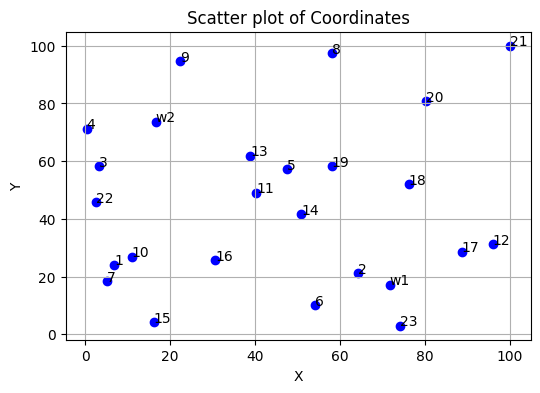

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Given coordinates
coordinates = np.array([
    [6.75859879717907, 24.1011220595671],
    [64.2020211216308, 21.2780005223912],
    [3.28223545665507, 58.3280585995255],
    [0.356408133450226, 71.2535984441914],
    [47.5416279589111, 57.2421947321968],
    [54.1391723668124, 10.1630144708565],
    [5.16311785475916, 18.3713689888664],
    [58.1077341232713, 97.325872003479],
    [22.3719171429327, 94.5307472331531],
    [10.9215147296463, 26.9026260431418],
    [40.2830425950062, 49.0059611185157],
    [95.9067950103118, 31.2537921390593],
    [38.8068853736467, 61.8496341187066],
    [50.7736281603872, 41.7122988413166],
    [16.1210451723109, 4.17415211185698],
    [30.5725260368337, 25.6641613944403],
    [88.6541848293903, 28.6034058450262],
    [76.1583329812348, 52.0601020081577],
    [57.9907902884404, 58.2901693224847],
    [80.1180100459334, 80.7424210060046],
    [99.879027610417, 99.9769056531731],
    [2.58720752188314, 45.8084939684228],
    [74.0498005304951, 2.98613115772289],
    [71.7091166549543, 17.2581705831028],
    [16.6066387616466, 73.6752906752222]
])

# Define keys for stores and warhouse
keys = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'w1', 'w2']

# Create a dictionary from the coordinates
coordinate_dict = {key: coord for key, coord in zip(keys, coordinates)}

# Extract x and y coordinates
x_values, y_values = zip(*coordinates)

# Set the size of the figure
plt.figure(figsize=(6, 4))

# Create a scatter plot
plt.scatter(x_values, y_values, color='b')

# Add labels for each point
for key, (x, y) in coordinate_dict.items():
    plt.text(x, y, str(key))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Coordinates')
plt.grid(True)
plt.show()


In [9]:
import math
from scipy.spatial import distance
# define the adjusted_matrix
size = len(coordinates[:,1])
adjusted_matrix = np.zeros((size,size))

# Calculate distances between each pair of coordinates
for i in range(0,size):
  for j in range (size):
    adjusted_matrix[i,j] = math.sqrt((coordinates[i,0] - coordinates[j,0])**2 + (coordinates[i,1] - coordinates[j,1])**2)
    #adjusted_matrix[i, j] = distance.euclidean(coordinates[i], coordinates[j])

adjusted_matrix_rounded = np.round(adjusted_matrix)
# Display the distance matrix
print("Distance Matrix:")
print(adjusted_matrix_rounded)

Distance Matrix:
[[  0.  58.  34.  48.  53.  49.   6.  89.  72.   5.  42.  89.  50.  47.
   22.  24.  82.  75.  62.  93. 120.  22.  71.  65.  51.]
 [ 58.   0.  71.  81.  40.  15.  59.  76.  84.  54.  37.  33.  48.  24.
   51.  34.  26.  33.  38.  62.  86.  66.  21.   9.  71.]
 [ 34.  71.   0.  13.  44.  70.  40.  67.  41.  32.  38.  97.  36.  50.
   56.  43.  90.  73.  55.  80. 105.  13.  90.  80.  20.]
 [ 48.  81.  13.   0.  49.  81.  53.  63.  32.  46.  46. 104.  40.  58.
   69.  55.  98.  78.  59.  80. 104.  26. 100.  89.  16.]
 [ 53.  40.  44.  49.   0.  48.  58.  41.  45.  48.  11.  55.  10.  16.
   62.  36.  50.  29.  11.  40.  68.  46.  60.  47.  35.]
 [ 49.  15.  70.  81.  48.   0.  50.  87.  90.  46.  41.  47.  54.  32.
   38.  28.  39.  47.  48.  75. 101.  63.  21.  19.  74.]
 [  6.  59.  40.  53.  58.  50.   0.  95.  78.  10.  47.  92.  55.  51.
   18.  26.  84.  79.  66.  98. 125.  28.  71.  67.  56.]
 [ 89.  76.  67.  63.  41.  87.  95.   0.  36.  85.  52.  76.  40.  56.
 

Initialization: Define the distance matrix representing the distances between each warehouse and store. Specify the number of warehouses, stores, and the maximum capacities for vans and lorries.

Nearest Store Selection: Define a function nearest_store to find the nearest unvisited store from a given location.
This function iterates over all stores, excluding those that have already been visited, and finds the one with the shortest distance.
Route Assignment:

Iterate over each warehouse.Start from each warehouse and iteratively select the nearest unvisited store until the capacity constraint for vans or lorries is reached.For each warehouse, repeat the above step until all stores are visited.
Cost Calculation:Define a function calculate_cost to compute the cost of a given route, considering the distance traveled and the vehicle type (van or lorry). This function iterates over the route, summing up the distances between consecutive stores.
The total cost for each route is calculated by multiplying the total distance by 1 for vans and by 2 for lorries, as lorries have double the capacity.
Results Display:

Print the routes for each warehouse, specifying the stores visited and the type of vehicle used.
Display the total cost for each warehouse and the overall total cost for all warehouses.
Optimization:

When calculating the cost for each route, the algorithm ensures that the capacity constraints of vans and lorries are met by returning to the warehouse and starting a new route if the capacity is exceeded.
By following this process, the code optimizes routes and minimizes costs by considering the nearest unvisited store at each step and adhering to capacity constraints.
Model Citation: This code was generated with the assistance of the ChatGPT model developed by OpenAI.
OpenAI. "Chat with ChatGPT." ChatGPT, 11 Apr. 2024, https://chat.openai.com/c/0befb8f2-86ee-4f5b-a44b-947cccb37d6f.

In [22]:
import numpy as np

# Define the distance matrix
distance_matrix = adjusted_matrix_rounded
# define the number of warehouses and  stores
num_warehouses = 2
num_stores = 23
# define the maxium cacpacity of vehicles: van and lorry
max_vans = 4
max_lorries = 16

def nearest_store(current_location, visited_stores):
    min_distance = float('inf')
    nearest_store_idx = None
    for idx in range(num_stores):
        if idx not in visited_stores:
            distance = distance_matrix[current_location][idx]
            if distance < min_distance:
                min_distance = distance
                nearest_store_idx = idx
    return nearest_store_idx, min_distance

def calculate_cost(route, vehicle_type):
    cost = 0
    for i in range(len(route) - 1):
        cost += distance_matrix[route[i]][route[i + 1]]
    return cost * (1 if vehicle_type == 'van' else 2)

# Initialize lists to store the routes and costs
warehouse_routes = [[] for _ in range(num_warehouses)]
warehouse_costs = [0] * num_warehouses

# Initialize lists to store the number of vans or lorries required for each warehouse
num_vans_required = [0] * num_warehouses
num_lorries_required = [0] * num_warehouses

# Main loop to assign stores to warehouses
for warehouse_idx in range(num_warehouses):
    current_location = warehouse_idx  # Starting from the warehouse itself
    visited_stores = set()

    # Continue until all stores are visited
    while len(visited_stores) < num_stores:
        route_stores = []

        # Select vehicle type based on remaining stores and capacity
        if len(visited_stores) + max_lorries >= num_stores:
            vehicle_type = 'lorry'
        else:
            vehicle_type = 'van'

        # Find the nearest store
        while len(route_stores) < (max_vans if vehicle_type == 'van' else max_lorries):
            nearest_store_idx, distance = nearest_store(current_location, visited_stores)
            if distance == float('inf'):  # No more stores left to visit
                break
            route_stores.append(nearest_store_idx)
            visited_stores.add(nearest_store_idx)
            current_location = nearest_store_idx

        # Calculate the cost for the current route
        route_cost = 0
        remaining_capacity = max_vans if vehicle_type == 'van' else max_lorries
        for store_idx in route_stores:
            if remaining_capacity > 0:
                route_cost += distance_matrix[current_location][store_idx]
                current_location = store_idx
                remaining_capacity -= 1
            else:
                # Return to warehouse and start a new route
                route_cost += distance_matrix[current_location][warehouse_idx]
                current_location = warehouse_idx
                route_cost += distance_matrix[current_location][store_idx]
                remaining_capacity = max_vans if vehicle_type == 'van' else max_lorries

        # Return to the warehouse
        route_cost += distance_matrix[current_location][warehouse_idx]

        # Update total cost and add the route to the list
        warehouse_costs[warehouse_idx] += route_cost
        warehouse_routes[warehouse_idx].append((warehouse_idx, route_stores, vehicle_type))

        # Update the number of vans or lorries required for the current warehouse
        if vehicle_type == 'van':
            num_vans_required[warehouse_idx] += 1
        else:
            num_lorries_required[warehouse_idx] += 1

# Print the results
for idx, routes in enumerate(warehouse_routes):
    total_cost_warehouse = 0  # Initialize total cost for the current warehouse
    print(f"Warehouse {idx + 1} routes:")
    for route in routes:
        if route[1]:  # Skip empty routes (return to warehouse)
            cost = calculate_cost(route[1], route[2])
            print(f"From Warehouse {route[0] + 1} to Stores {', '.join(str(store + 1) for store in route[1])} using {route[2]}")
            print(f"Cost: £{cost}")
            total_cost_warehouse += cost  # Add the cost of the current route to the total cost for the warehouse
    print(f"Total cost for Warehouse {idx + 1}: £{total_cost_warehouse}")
    print(f"Number of vans required: {num_vans_required[idx]}")
    print(f"Number of lorries required: {num_lorries_required[idx]}")
    print()

    # Add the total cost for the current warehouse to the list
    warehouse_costs[idx] = total_cost_warehouse

# Calculate the total cost
total_cost = sum(warehouse_costs)
print(f"Total cost for all warehouses: £{total_cost}")


Warehouse 1 routes:
From Warehouse 1 to Stores 1, 10, 7, 15 using van
Cost: £33.0
From Warehouse 1 to Stores 16, 11, 5, 13 using van
Cost: £46.0
From Warehouse 1 to Stores 19, 14, 2, 6, 23, 17, 12, 18, 20, 8, 9, 4, 3, 22, 21 using lorry
Cost: £812.0
Total cost for Warehouse 1: £891.0
Number of vans required: 2
Number of lorries required: 1

Warehouse 2 routes:
From Warehouse 2 to Stores 2, 6, 23, 17 using van
Cost: £65.0
From Warehouse 2 to Stores 12, 18, 19, 5 using van
Cost: £59.0
From Warehouse 2 to Stores 13, 11, 14, 16, 10, 1, 7, 15, 22, 3, 4, 9, 8, 20, 21 using lorry
Cost: £590.0
Total cost for Warehouse 2: £714.0
Number of vans required: 2
Number of lorries required: 1

Total cost for all warehouses: £1605.0


part 3

This code performs a genetic algorithm optimization to schedule the usage of appliances over a 24-hour period to minimize the cost of electricity while considering energy consumption and off-peak usage constraints. Here's a summary of what each part of the code does:

Initialization: Defines parameters such as the number of time steps (T), number of appliances (N), energy budget (B), weighting factor for the trade-off between cost and consumption (alpha), and the minimum percentage of electricity usage during off-peak hours (off_peak_threshold).

Appliance Costs and Consumption: Randomly generates matrices representing the costs and energy consumption of each appliance over the 24-hour period.

Time-of-Use Electricity Tariffs: Defines peak and off-peak hours based on the time-of-use electricity tariffs.

Genetic Algorithm Parameters: Sets parameters for the genetic algorithm, such as population size, number of generations, and mutation rate.

Objective Function: Defines the objective function to minimize, which includes the total cost, total consumption, and penalty for violating the off-peak usage constraint.

Initialization of Population: Initializes a population of schedules for appliances, where each schedule represents the on/off status of each appliance for each hour.

Genetic Algorithm Optimization Loop: Iterates through generations of the genetic algorithm, evaluating the fitness of each individual schedule, selecting parents based on fitness, performing crossover and mutation, and ensuring that at least one appliance is turned on at each time step.

Selection of Best Individual: Selects the best individual (schedule) from the final population based on the minimized objective function.

Output of Schedules: Prints the original and optimized schedules for each appliance.

Plotting: Plots the comparison of cost and consumption between the original and optimized schedules over the 24-hour period.

The genetic algorithm optimizes the schedule to minimize cost while considering energy consumption and the off-peak usage constraint, resulting in an optimized schedule that balances cost savings and efficient energy usage.

 Model Citation: This code was generated with the assistance of the ChatGPT model developed by OpenAI.
Citation Format:
OpenAI. "Chat with ChatGPT." ChatGPT, 11 Apr. 2024, https://chat.openai.com/c/0befb8f2-86ee-4f5b-a44b-947cccb37d6f.

Original Schedule:
Appliance 1: 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
Appliance 2: 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0
Appliance 3: 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
Appliance 4: 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
Appliance 5: 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0
Appliance 6: 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1
Appliance 7: 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
Appliance 8: 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0
Appliance 9: 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0
Appliance 10: 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1

Optimized Schedule:
Appliance 1: 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
Appliance 2: 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0
Appliance 3: 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
Appliance 4: 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
Appliance 5: 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
Appliance 6: 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1

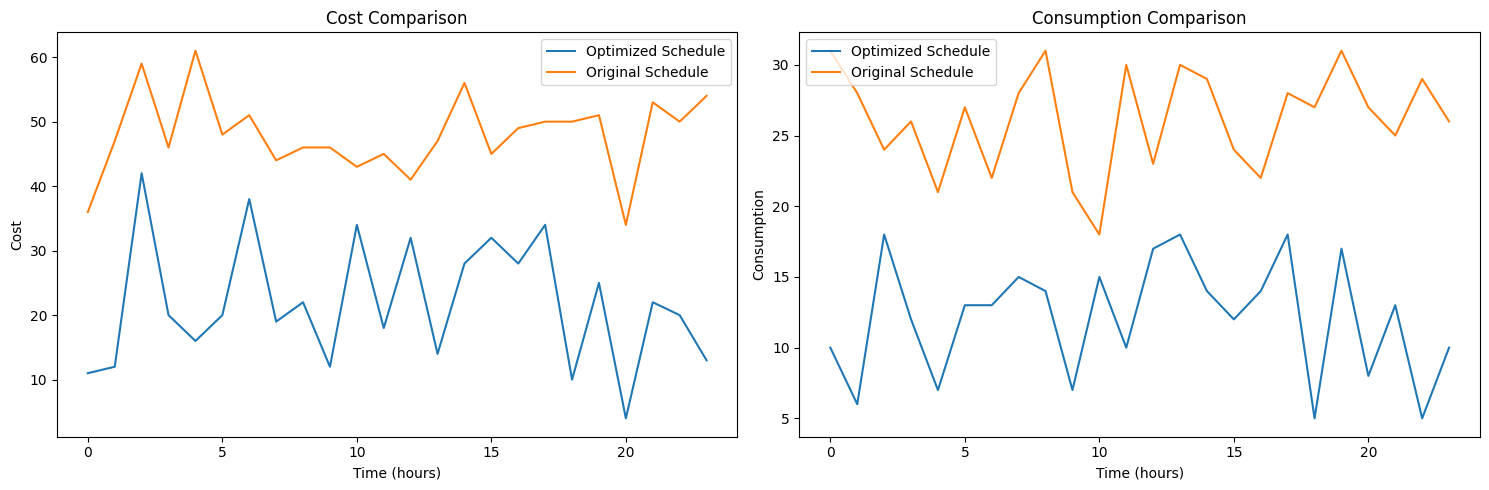

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 24  # Number of time steps (hours)
N = 10   # Number of appliances
B = 100 # Energy budget
alpha = 0.5  # Weighting factor for the trade-off between cost and consumption
off_peak_threshold = 0.4  # Minimum percentage of electricity usage during off-peak hours

# Define appliance costs (randomly generated for demonstration)
costs = np.random.randint(1, 10, size=(N, T))

# Define appliance energy consumption (randomly generated for demonstration)
consumption = np.random.randint(1, 5, size=(N, T))

# Define time-of-use electricity tariffs
peak_hours = range(8, 22)  # Peak hours from 8 am to 10 pm
off_peak_hours = list(set(range(T)) - set(peak_hours))  # Off-peak hours from 10 pm to 8 am

# Define genetic algorithm parameters
population_size = 20
generations = 100
mutation_rate = 0.1

# Define objective function
def objective_function(schedule):
    total_cost = np.sum(costs * schedule)
    total_consumption = np.sum(consumption * schedule)

    # Calculate off-peak consumption
    off_peak_consumption = np.sum(consumption[:, off_peak_hours] * schedule[:, off_peak_hours])

    # Reflect Off-Peak Usage Constraint in the objective function
    off_peak_constraint = (off_peak_consumption / total_consumption) >= off_peak_threshold

    # Return the weighted sum of cost and consumption with penalty for violating off-peak usage constraint
    return alpha * total_cost + (1 - alpha) * total_consumption + (1e6 * (1 - off_peak_constraint))

# Initialize population
population = np.random.randint(2, size=(population_size, N, T))

# Genetic Algorithm
for generation in range(generations):
    # Evaluate fitness of each individual
    fitness = np.array([objective_function(individual) for individual in population])

    # Select parents based on fitness
    parents = population[np.random.choice(population_size, size=population_size//2, replace=True, p=fitness/fitness.sum())]

    # Crossover
    children = np.array([np.concatenate((parents[np.random.choice(len(parents))][:, :T//2],
                                          parents[np.random.choice(len(parents))][:, T//2:]), axis=1)
                         for _ in range(population_size)])

    # Mutation
    for child in children:
        if np.random.random() < mutation_rate:
            index = np.random.randint(N)
            child[index, np.random.randint(T)] = 1 - child[index, np.random.randint(T)]

    # Ensure at least one appliance is turned on at each time step
    for i in range(T):
        if np.sum(children[:, :, i]) == 0:
            index = np.random.randint(population_size)
            appliance_index = np.random.randint(N)
            children[index, appliance_index, i] = 1

    # Replace old population with new generation
    population = children

# Select best individual
best_individual = population[np.argmin([objective_function(individual) for individual in population])]

# Output the schedule of appliances for both original and optimized schedules
print("Original Schedule:")
for i in range(N):
    print(f"Appliance {i+1}: {' '.join(map(str, population[0][i]))}")

print("\nOptimized Schedule:")
for i in range(N):
    print(f"Appliance {i+1}: {' '.join(map(str, best_individual[i]))}")

# Plot cost and consumption comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(np.sum(costs * best_individual, axis=0), label='Optimized Schedule')
plt.plot(np.sum(costs, axis=0), label='Original Schedule')
plt.title('Cost Comparison')
plt.xlabel('Time (hours)')
plt.ylabel('Cost')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.sum(consumption * best_individual, axis=0), label='Optimized Schedule')
plt.plot(np.sum(consumption, axis=0), label='Original Schedule')
plt.title('Consumption Comparison')
plt.xlabel('Time (hours)')
plt.ylabel('Consumption')
plt.legend()

plt.tight_layout()
plt.show()